# Bulldozer Price Prediction using Machine Learning

## 1.  Problem Definition
> Our problem statement bhere is how well can we predict the future sale price of bulldozers given its characteristics and the previous sale price of similar bulldozers

## 2. Data 
> The data is obtained from the Kaggle Bluebook for Bulldozers Competition. 

The link for the same: https://www.kaggle.com/c/bluebook-for-bulldozers/data

The data file contains 3 main datasets: 
* Train.csv is the training set, which contains data through the end of 2011.

* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices. 

So we have to try and minimise the RMSLE

## 4. Features

The features and its description is given in the form of an Excel Sheet within the data folder 

In [1]:
# Importing all the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import sklearn

In [2]:
# Importing the training and validation sets
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [3]:
# Checking for Null Values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

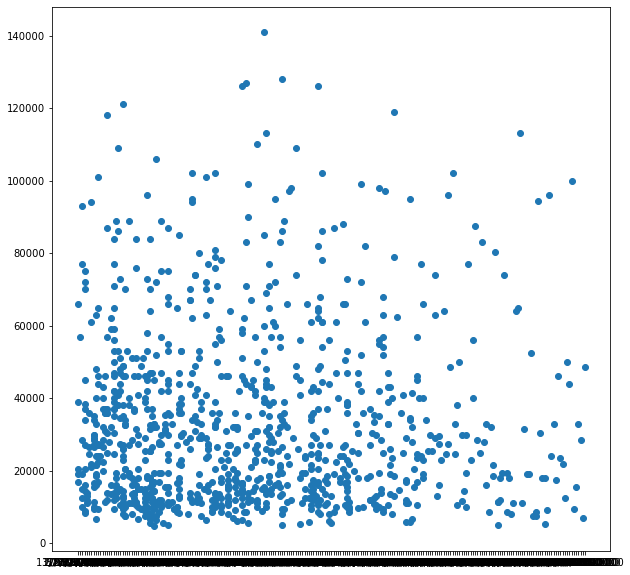

In [4]:
# Plotting the Sales Date vs. the Price
fig, ax = plt.subplots(figsize=(10,10))
ax = plt.scatter(df.saledate[:1000], df.SalePrice[:1000])

In [5]:
df.saledate.dtype

dtype('O')

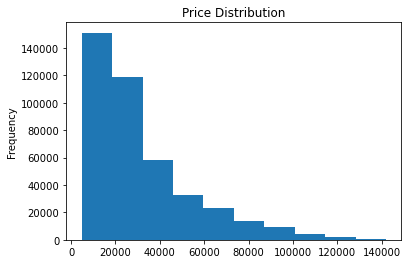

In [6]:
# Plotting the Distribution of Sales Price
df.SalePrice.plot(kind="hist")
plt.title("Price Distribution");

## Parsing the Date Time 

We are using the `parse_dates` parameter to convert date and time columns to data time objects

In [7]:
# Parsing the Sale Dates as Date Time Objects
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False,
                parse_dates=["saledate"])
df.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

Text(0, 0.5, 'Sale Price')

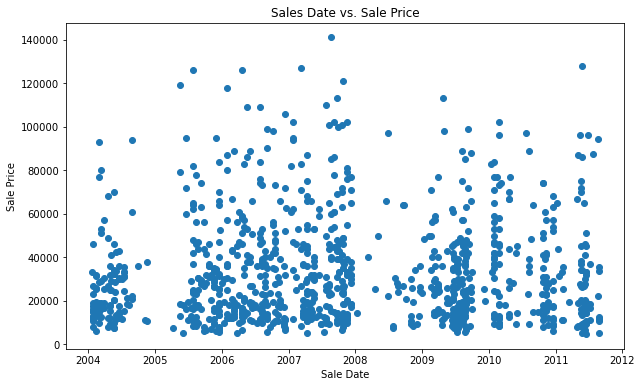

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
ax = plt.scatter(df.saledate[:1000], df.SalePrice[:1000])
plt.title("Sales Date vs. Sale Price")
plt.xlabel("Sale Date")
plt.ylabel("Sale Price")

In [9]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# To view the truncated columns
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [11]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

## Sorting the DataFrame by the Dates

> Whenever we deal with a time series problem it is a good practice to sort the data with respect to Date

In [12]:
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate[:10]

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

## Making a Copy of Data

* It is always a good practice to make a temporary copy of data to be able to revert back whenever needed.

In [13]:
df_tmp = df.copy()
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


## Adding More Features to our DataFrame with DateTime attributes

In [14]:
df_tmp["SaleDay"] = df_tmp.saledate.dt.day
df_tmp["SaleMonth"] = df_tmp.saledate.dt.month
df_tmp["SaleYear"] = df_tmp.saledate.dt.year
df_tmp["SaleDayofWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["SaleDayofYear"] = df_tmp.saledate.dt.dayofyear

df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [15]:
# Now as we have added saledate as different features into the df we can drop the saledate column
df_tmp.drop("saledate", axis=1, inplace=True)

In [16]:
# Checking the Value Counts for different attributes
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling

> Now we have done enough of EDA, lets get to creating a model.

In [17]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, # use all cores of processor
                             random_state=42 # similar to random seed
                             )

## Convert String Values into Pandas Categories

We have to convert the non numeric data into pandas categorial features in order to use them in our model.

Learn More: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Categorical.html

In [18]:
# checking if a column is string
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [19]:
# Looping for each column
for label, content in df_tmp.items():
    if(pd.api.types.is_string_dtype(content)):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [20]:
# This will change all the string values into categories
for label, content in df_tmp.items():
    if(pd.api.types.is_string_dtype(content)):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [21]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [22]:
# The string values are now converted into categories and also ordered
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [23]:
# also these string values are now under the hood converted into numbers
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Now we have converted string into numbers but we still have a lot of missing values in our data set

In [24]:
# percentage of null values
df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## Now let us save the preprocessed data into a csv

In [25]:
# Now let us save the preprocessed data into a csv
df_tmp.to_csv("data/bluebook-for-bulldozers/train_tmp.csv", index=False)

# Re-importing the saved data
df_tmp = pd.read_csv("data/bluebook-for-bulldozers/train_tmp.csv", low_memory=False)
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


## Fill Missing Values


### Filling Numeric Missing Values First

In [26]:
# Checking which of the columns are numeric
for label, content in df_tmp.items():
    if(pd.api.types.is_numeric_dtype(content)):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
SaleDay
SaleMonth
SaleYear
SaleDayofWeek
SaleDayofYear


In [27]:
# Checking which of the columns are numeric and contain null values
for label, content in df_tmp.items():
    if(pd.api.types.is_numeric_dtype(content)):
        if(pd.isnull(content).sum()):
            print(label)

auctioneerID
MachineHoursCurrentMeter


## Filling the Missing Numeric values with Median

In [28]:
for label, content in df_tmp.items():
    if(pd.api.types.is_numeric_dtype(content)):
        if(pd.isnull(content).sum()):
            # Add a binary column to show whether the column has null values
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill the missing values with median
            df_tmp[label] = content.fillna(content.median())

In [29]:
# Checking which of the columns are numeric and contain null values
for label, content in df_tmp.items():
    if(pd.api.types.is_numeric_dtype(content)):
        if(pd.isnull(content).sum()):
            print(label)
            
# There are no missing numeric values

In [30]:
# Why are we using median and not mean?

hundreds = np.full(shape=(1000,), fill_value=100)
hundreds_billion = np.append(hundreds, 10000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(100.0, 10089.91008991009, 100.0, 100.0)

In [31]:
# There is just one different value at the end but still the mean is changed a lot
hundreds_billion

# Hence median is more robust and we should use median instead of mean

array([     100,      100,      100, ...,      100,      100, 10000000])

In [32]:
# Checking how many missing values we have filled
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [33]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

## Filling and turning Categorial variables into numbers

In [34]:
# Checking which of the columns are non numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [35]:
# Turn all the categorical variables into numbers and fill missing values
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column if value is missing
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Converting into numbers
        df_tmp[label] = pd.Categorical(content).codes+1 # Missing data will have code -1 so +1 makes it 0 and all missing data will have code 0

In [36]:
pd.Categorical(df_tmp.state).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [37]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

**Now that all the data is numeric and there is are no missing values, we can finally fit it into the model.**

In [38]:
len(df_tmp)

412698

## Splitting the Data into Training and Validation Sets

In [39]:
df_tmp.SaleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: SaleYear, dtype: int64

In [40]:
# Splitting into train and valid
df_train = df_tmp[df_tmp.SaleYear != 2012]
# Valid set contains all the data for the year 2012
df_valid = df_tmp[df_tmp.SaleYear == 2012]

len(df_train), len(df_valid)

(401125, 11573)

In [41]:
# Splitting into X and y
X_train, y_train = df_train.drop("SalePrice", axis = 1) , df_train["SalePrice"]
X_valid, y_valid = df_valid.drop("SalePrice", axis = 1) , df_valid["SalePrice"]

len(X_train), len(y_train), len(X_valid), len(y_valid)

(401125, 401125, 11573, 11573)

In [42]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

## Creating a custom evaluation function (RMSLE)

    The contest requires us to evaluate on the basis of Root Mean Squared Log Error

In [43]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def cal_rmsle(y_test, y_preds):
    """
    Calculates the Root Mean Squared Log Error given the true labels and predicted labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Creating more evaluation functions
def show_scores(model):
    """
    Given the model, the function will return a bunch of different metrics after evaluation
    """
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores={
        "Training MAE" : mean_absolute_error(y_train, train_preds),
        "Valid MAE" : mean_absolute_error(y_valid, val_preds),
        "Training RMSLE" : cal_rmsle(y_train, train_preds),
        "Valid RMSLE" : cal_rmsle(y_valid, val_preds),
        "Training R2 Score" : r2_score(y_train, train_preds),
        "Valid R2 Score" : r2_score(y_valid, val_preds)
    }
    return scores

## Testing our Model on a Subset (to tune hyperparameters)

In [44]:
len(X_train)

# Fitting this data into model will take a lot of time

401125

In [45]:
# Change max samples values
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)

In [46]:
%%time
# Cutting down the max number of samples each of the n estimators have to work on
model.fit(X_train, y_train)

Wall time: 10.4 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [47]:
show_scores(model)

{'Training MAE': 5560.196994802119,
 'Valid MAE': 7149.5038546617125,
 'Training RMSLE': 0.25778619742858433,
 'Valid RMSLE': 0.29225959234082205,
 'Training R2 Score': 0.860739839617666,
 'Valid R2 Score': 0.8332181632267017}

In [48]:
## HyperParameter Tuning using RandomizedSearchCV
%time
from sklearn.model_selection import RandomizedSearchCV

# Params Distribution for tuning Regressor
rf_grid = {"n_estimators" : np.arange(10, 100, 10),
          "max_depth": [None, 3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf" : np.arange(1,20,2),
          "max_samples": [10000],
          "max_features" : [0.5, 1, "sqrt", "auto"]}

# Instantiate the RSCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                             param_distributions=rf_grid,
                             n_iter=2,
                             cv=5,
                             verbose=True)

rs_model.fit(X_train, y_train)

Wall time: 0 ns
Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [49]:
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 6,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

## Fitting the model with ideal parameters

**Note:** These parameters were found after 100 iterations of RandomizedSearchCV

In [50]:
%%time

ideal_model = RandomForestRegressor(n_estimators=40,
 min_samples_split=14,
 min_samples_leaf= 1,
 max_samples=None,
 max_features=0.5,
 n_jobs=-1,
 random_state=42)

ideal_model.fit(X_train, y_train)

Wall time: 52.3 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [51]:
# Scores of ideal model ran on all of the data
show_scores(ideal_model)

{'Training MAE': 2948.437939155032,
 'Valid MAE': 5972.022811925787,
 'Training RMSLE': 0.14427612717023205,
 'Valid RMSLE': 0.24690663819223088,
 'Training R2 Score': 0.9589503940590999,
 'Valid R2 Score': 0.8805400191179018}

In [52]:
# Scores of rs model ran on 10000 samples only
show_scores(rs_model)

{'Training MAE': 6491.121758755347,
 'Valid MAE': 7845.221787835402,
 'Training RMSLE': 0.29203430821241605,
 'Valid RMSLE': 0.3154488792701259,
 'Training R2 Score': 0.8136500817767742,
 'Valid R2 Score': 0.7976387245959107}

## Predicting the Price on Test Data Set

In [53]:
# Import the test data set
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                     low_memory=False,
                     parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


## Preprocessing the Test Data to match the Training data

In [54]:
def preprocess(df):
    """
    Takes a dataframe and does some preprocessing, then returns the processed dataframe
    """
    # processing the sale date 
    df["SaleDay"] = df.saledate.dt.day
    df["SaleMonth"] = df.saledate.dt.month
    df["SaleYear"] = df.saledate.dt.year
    df["SaleDayofWeek"] = df.saledate.dt.dayofweek
    df["SaleDayofYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    for label, content in df.items():
        # Convert String values into categories
        if(pd.api.types.is_string_dtype(content)):
            df_tmp[label] = content.astype("category").cat.as_ordered()
        
        # Fill missing numeric values with median
        if(pd.api.types.is_numeric_dtype(content)):
            if(pd.isnull(content).sum()):
            # Add a binary column to show whether the column has null values
                df[label+"_is_missing"] = pd.isnull(content)
            # Fill the missing values with median
                df[label] = content.fillna(content.median())
    
    # Fill non numeric data and convert to categories
    
        if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column if value is missing
            df[label+"_is_missing"] = pd.isnull(content)
        # Converting into numbers
            df[label] = pd.Categorical(content).codes+1 # Missing data will have code -1 so +1 makes it 0 and all missing data will have code 0
    return df

In [55]:
df_test = preprocess(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [56]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [57]:
# Checking which columns are missing using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [58]:
# Filling the missing column with false
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [59]:
# Make predictions on test data
test_preds = ideal_model.predict(df_test)
len(test_preds)

E:\ML_Projects\price_prediction_project\env\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


12457

In [60]:
# Format predictions in the same format as asked in Kaggle

df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,20853.865098
1,1227844,24886.593914
2,1227847,46814.471941
3,1227848,58885.336725
4,1227863,41047.480876
...,...,...
12452,6643171,41350.054451
12453,6643173,18168.418213
12454,6643184,13132.430403
12455,6643186,21448.131009


In [61]:
# Export Data into csv
df_preds.to_csv("results/submission.csv")

## Feature Importance

In [62]:
# Find the important features 
ideal_model.feature_importances_

array([3.37498724e-02, 1.68673511e-02, 4.30653797e-02, 1.82028843e-03,
       3.33341239e-03, 2.09544965e-01, 3.24202109e-03, 1.03880790e-03,
       4.45488700e-02, 4.26566751e-02, 6.24378859e-02, 4.37196705e-03,
       2.19888762e-02, 1.56358201e-01, 4.32867718e-02, 6.00918037e-03,
       2.53909220e-03, 1.91599945e-03, 3.08885960e-03, 5.24337490e-02,
       1.58025546e-03, 4.75149379e-05, 1.02539439e-03, 1.68396763e-04,
       1.24204203e-03, 2.74177665e-05, 2.01587792e-03, 5.25774700e-03,
       2.31513034e-03, 4.27942676e-03, 3.76555933e-03, 2.38070443e-03,
       3.50229865e-03, 2.44250718e-04, 2.59833620e-04, 6.71500736e-03,
       8.32857539e-04, 1.58930365e-02, 2.15402430e-03, 7.40199689e-04,
       9.19573016e-04, 8.32217384e-04, 2.95068632e-03, 6.04942456e-04,
       4.46667416e-04, 3.73310409e-04, 2.69220757e-04, 2.73398435e-03,
       1.02306023e-03, 2.82399342e-04, 3.13033751e-04, 5.60680016e-03,
       3.75050561e-03, 7.31445660e-02, 2.92301238e-03, 9.90099681e-03,
      

In [63]:
# Helper function to plot the first 20 most important features
def plot_importance(columns, importance, n=20):
    df = (pd.DataFrame({"Features" : columns, "Feature Importances" : importance})
         .sort_values("Feature Importances", ascending=False)
         .reset_index(drop=True))
    # Plot the dataframe
    fig, ax = plt.subplots(figsize=(10,6))
    ax.barh(df["Features"][:n], df["Feature Importances"][:n])
    ax.set_xlabel("Faeture Importances")
    ax.set_ylabel("Features")
    ax.invert_yaxis()

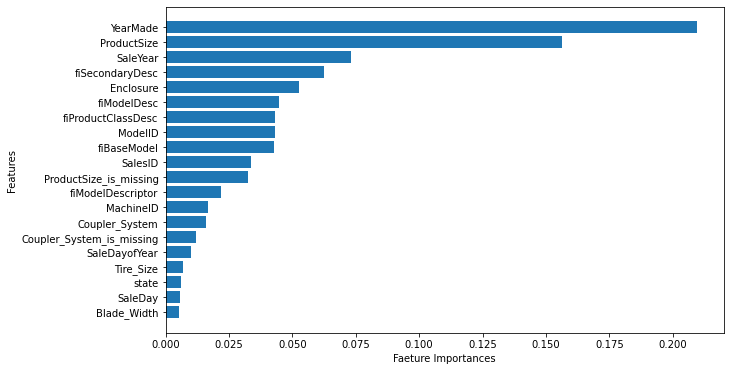

In [64]:
plot_importance(X_train.columns, ideal_model.feature_importances_)